# Machine learning started in previous lecture

# LINEAR REGRESSION

Multiple linear regression

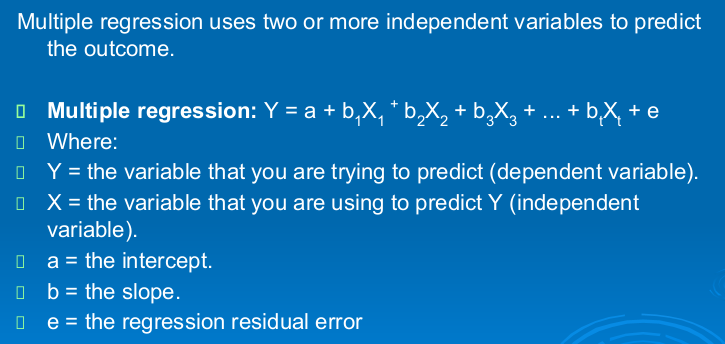

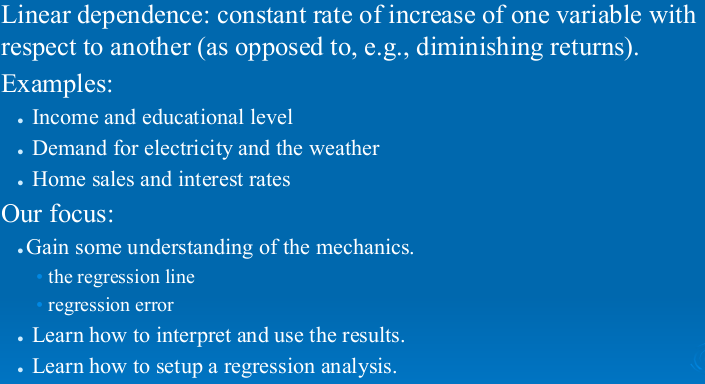

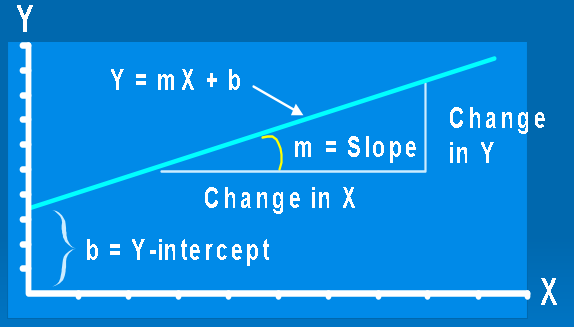

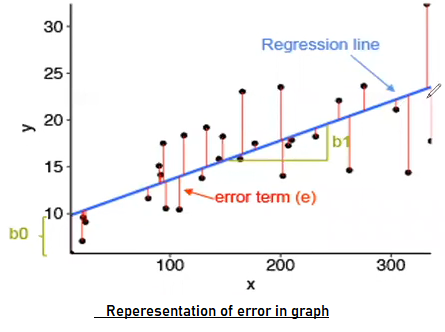

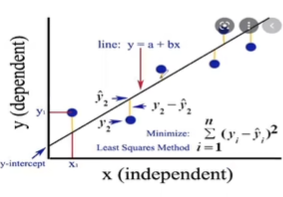

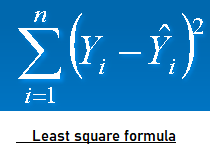

# Parameter estimation example

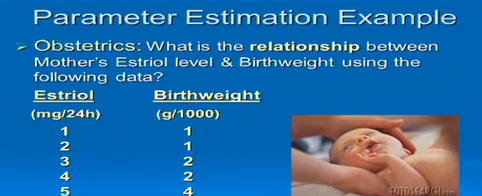

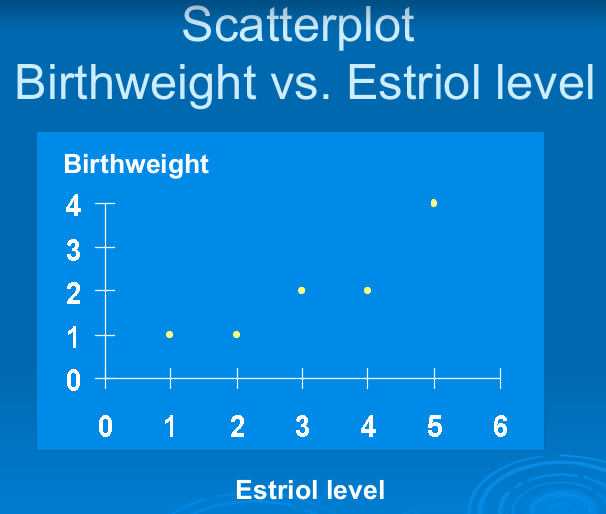

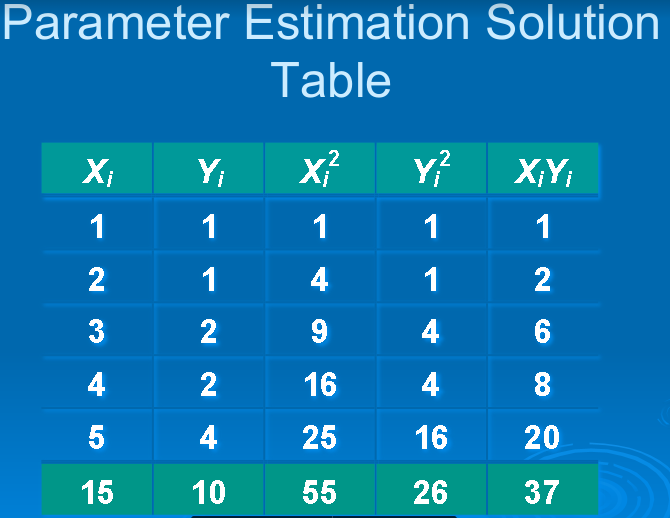

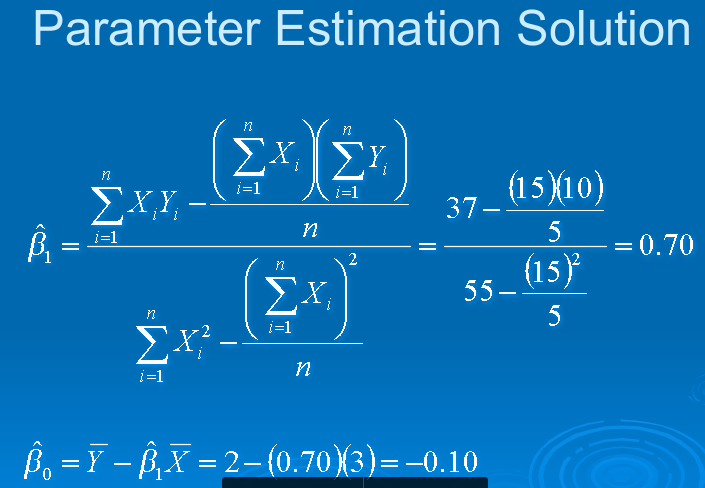

# Scikit Learn is the machine learning library of python

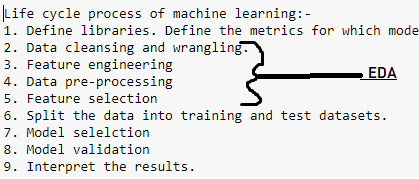

In [2]:
#library or module is sklearn
#Class is linear regression.
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split#splits between training and testing data.

In [ ]:
#sklearn.metrics class is generally used for error or accuracy measurement.
#sklearn is the library or module
#metrics is a class inside sklearn libary.
#mean_squared_error, mean_absolute_error is a method inside the class.

In [3]:
from sklearn.datasets import load_boston #boston datasets is already present in sklearn for practice.

In [5]:
boston=load_boston()

In [6]:
boston #data in the independent variable. This part holds area, room number, crime rate,radial highways,tax etc.
#target is the output variable

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [10]:
boston.keys() 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
boston.data #gives the input data contained in each columns separately.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
boston.target    #Gives the value of dependent variables. Here it is the house price in thousand dollars.

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [18]:
boston.filename

'C:\\Users\\sayan\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [19]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [21]:
bos.shape

(506, 13)

In [22]:
#adding a new column to the dataframe showing the price(target variable)
bos['target']=boston.target

In [23]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [25]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [26]:
bos.shape

(506, 14)

In [27]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [29]:
bos.isnull().sum() #no null values present

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<AxesSubplot:>

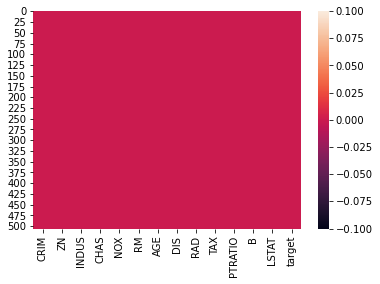

In [30]:
sns.heatmap(bos.isnull()) #no null values present

In [31]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


High standard deviation is present in ZN, INDUS, AGE, TAX . Means data is spread too much. Range is high.

CRIM, INDUS, RAD has mean greater than median, it means that they have right skewed data.

Large data gap between 75 percentile and max in CRIM,ZN,INDUS. Hence outliers are present.

In [32]:
bos.skew() #shows the skewness in data.

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<AxesSubplot:>

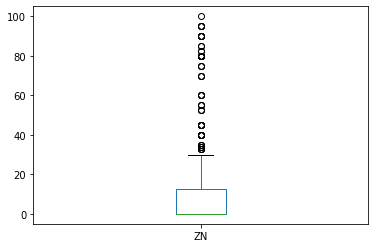

In [33]:
bos['ZN'].plot.box() #outliers present

In [35]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(bos)) #np.abs=numpy.absolute= converts the zscore obtained into mod value.
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [36]:
threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [38]:
z[56][1] #zscore of data present at 56th row and 1st column

3.160440923062437

<AxesSubplot:ylabel='Frequency'>

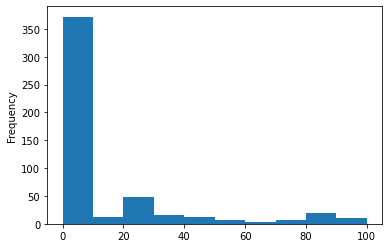

In [39]:
bos['ZN'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

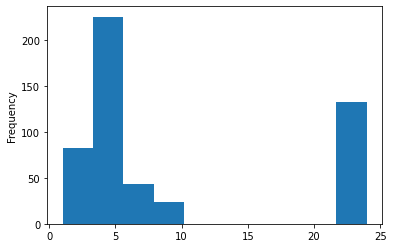

In [40]:
bos['RAD'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

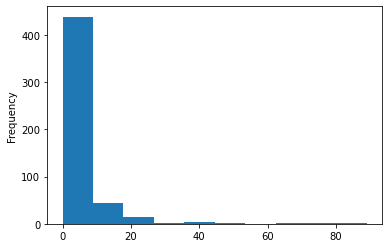

In [41]:
bos['CRIM'].plot.hist()

In [42]:
#bos['CRIM']=np.log(bos['CRIM']) #doing logarithm reduces skewness in data
#bos['CRIM'].plot.hist()

In [43]:
from scipy.stats import boxcox
# 0 -> log transform
# .5 -> square root transform
bos['CRIM']=boxcox(bos['CRIM'],0) #log transform #np.log(bos['CRIM']) can also be used.

<AxesSubplot:ylabel='Frequency'>

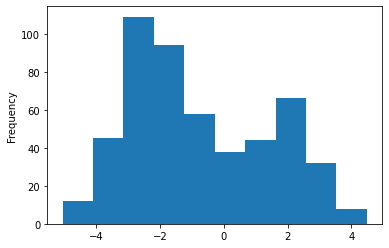

In [45]:
bos['CRIM'].plot.hist() #skewness reduced

In [46]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,-3.095111,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,-2.800824,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,-2.211009,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


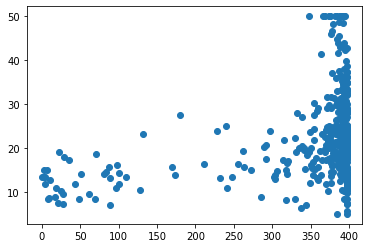

In [47]:
plt.scatter(bos['B'],bos['target'])
plt.show()                          #with 'B', the price is increasing slowly and then getting saturated.

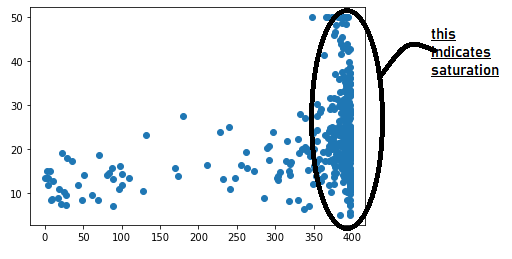

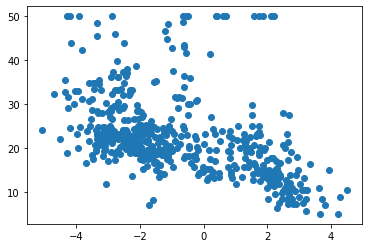

In [48]:
plt.scatter(bos['CRIM'],bos['target'])
plt.show()                                #house price is decreasing with crime rate

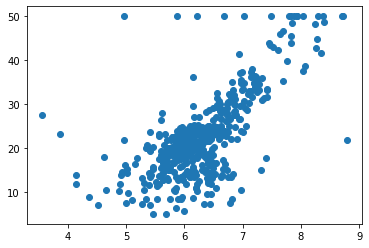

In [50]:
x=bos['RM']
y=bos['target']
plt.scatter(x,y)
plt.show()                                          #house price is increating with room number

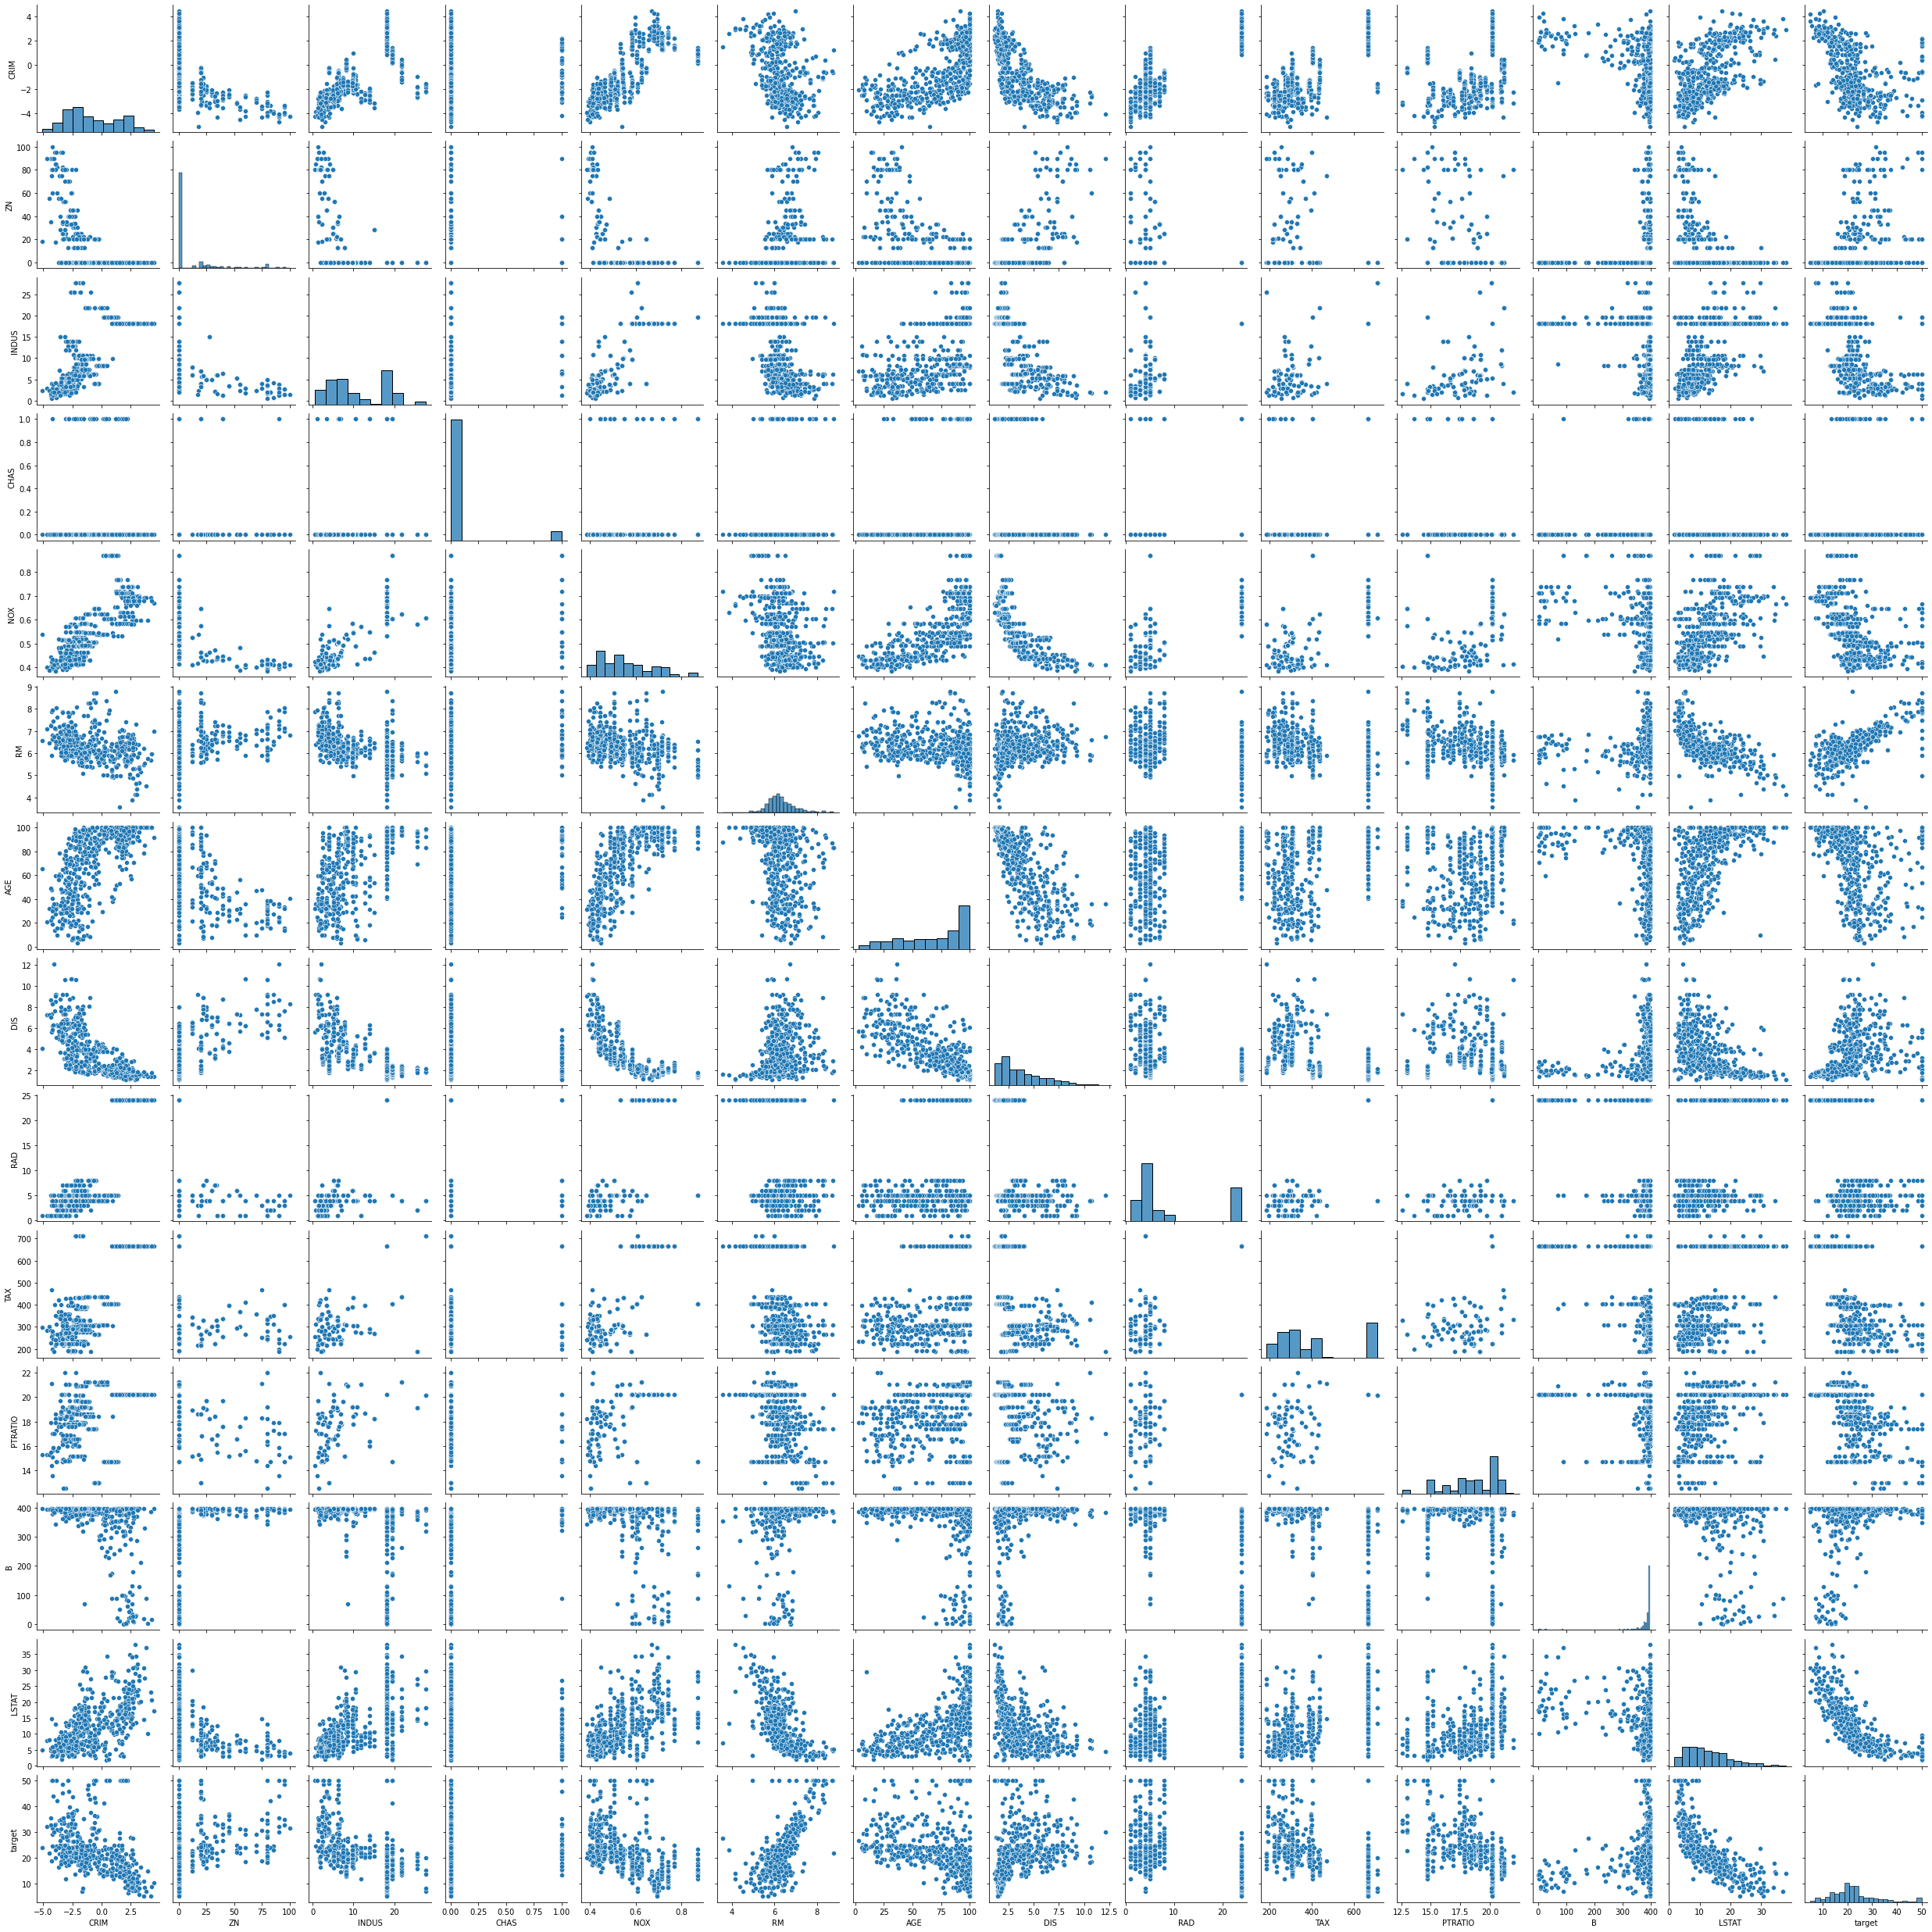

In [51]:
sns.pairplot(bos)

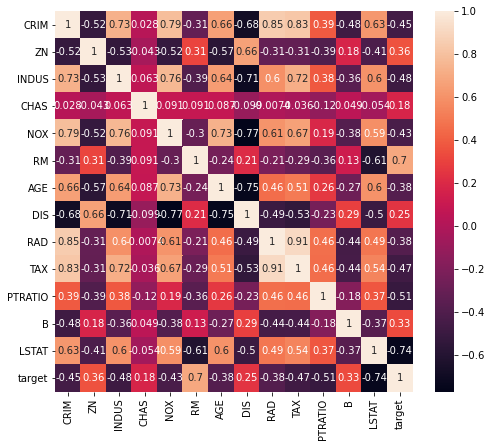

In [52]:
boscor=bos.corr()
plt.figure(figsize=(8,7))
sns.heatmap(boscor,annot=True)
plt.show()

In [53]:
boscor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.517091,0.730821,0.028496,0.788616,-0.306943,0.658284,-0.681903,0.853407,0.828234,0.389554,-0.478755,0.626615,-0.454302
ZN,-0.517091,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.730821,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.028496,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.788616,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.306943,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.658284,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.681903,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.853407,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.828234,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


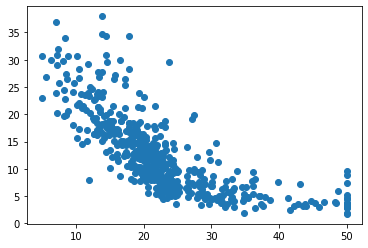

In [55]:
plt.scatter(bos['target'],bos['LSTAT'])

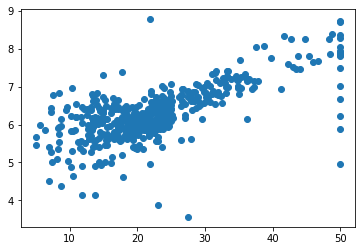

In [57]:
plt.scatter(bos['target'],bos['RM'])

In [58]:
#drop the lstat
bos.drop('LSTAT',axis=1,inplace=True)

In [59]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [62]:
bos_new=bos[(z<3).all(axis=1)]
bos_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,-3.095111,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,-2.800824,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,-2.211009,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


In [64]:
bos.shape

(506, 13)

In [66]:
bos_new.shape

(415, 13)

In [67]:
#saving bos_new inside variable bos(to make row drop effect permanent)
bos=bos_new

In [68]:
bos_new.shape

(415, 13)

In [71]:
x=bos.iloc[:,0:-1]                           #index '-1' is not included. It will show from 0 to -2.    #all rows included.
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [72]:
y=bos.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [73]:
x.shape

(415, 12)

In [74]:
y.shape

(415,)

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42) #dividing into train and test dataset

In [77]:
x_train.shape

(278, 12)

In [78]:
y_train.shape

(278,)

In [79]:
x_test.shape

(137, 12)

In [81]:
y_test.shape

(137,)

In [82]:
lm=LinearRegression() #object 'lm' is being initiated from class.

In [84]:
lm.fit(x_train,y_train) #training is being done here

LinearRegression()

In [87]:
lm.coef_ #finding out the coefficient values in the linear regression equation. 
#Y- intercept is not included here.

array([ 4.14796426e-01, -9.48452702e-03, -4.06227602e-02,  5.72909775e-14,
       -1.23983569e+01,  8.31144766e+00, -6.77907881e-02, -1.13441493e+00,
        5.01745969e-02, -1.14702471e-02, -7.86910388e-01,  9.22717357e-03])

In [89]:
lm.intercept_ #This is the intercept value.

1.8854666465849448

In [90]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'target'],
      dtype='object')

In [91]:
lm.score(x_train,y_train) #testing how well the model has been trained. How well the data has fitten into the line?

0.7450145138939896

In [92]:
#predict the value
pred=lm.predict(x_test)     #Shows the prices calculated by the model.
print("Predicted result price:",pred)
print("actual price:",y_test) #shows the actual price.

Predicted result price: [20.52442424 14.50954987 31.48981889 18.38422384 13.11595168 20.74166358
 17.31106356 25.10782451 29.63472112 10.80717631 17.72388147 15.66550921
  8.98488733 24.2796744  28.0476132  10.66047743 25.72749894 27.39232049
 24.82886327 14.00150342 21.74381609 19.10692104 23.56431589 12.02612149
 21.95599491 21.65951382 31.75447852 27.59747081 22.12417845 25.11716752
 32.44831628 14.71524841 13.54990408 26.20905344 15.60321561 15.05490348
 26.86359361 22.35845603 13.86144763 18.99549243 17.0945682  18.05130457
 20.53768755 26.7156161  17.09451963 26.13236614 19.94441974 19.53061132
 17.73605627 24.45928944 20.77561576 19.08973639 39.75458281 13.43911029
 19.02561668 22.10396188 18.67498499 41.20330795 20.14021397 18.15193296
 26.50489232 16.78844208 24.55486022 27.9783275  14.51500777  5.34938429
 34.18098705 19.63353383 19.10870329 22.45899667 35.32998138 19.93681787
 24.22017841 24.67056111 15.35382945 22.52605265 16.4249922  17.9233105
 22.49542546 16.40495667 17.

In [93]:
print("error")

print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred)))

#mean_squared_error, mean_absolute_error are methods inside metrics class.
#metrics is a class inside sklearn library.
#metrics is generally used for checking errors.

error
Mean absolute error: 2.828070501926145
Mean squared error: 25.677469856868516
Root Mean Squared Error: 5.067294135617995
